In [ ]:
import numpy as np
import scipy.special as spe
import scipy.integrate as integrate

%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D

# Increase resolution for retina display
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# Load interactive widgets
import ipywidgets as widgets
import ipyvolume as ipv

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  del sys.path[0]


In [ ]:
def psi_R(r, n=1, l=0):
    coeff = np.sqrt((2.0/n)**3 * spe.factorial(n-l-1) /(2.0*n*spe.factorial(n+l)))
    laguerre = spe.assoc_laguerre(2.0*r/n,n-l-1,2*l+1)
    
    return coeff * np.exp(-r/n) * (2.0*r/n)**l * laguerre

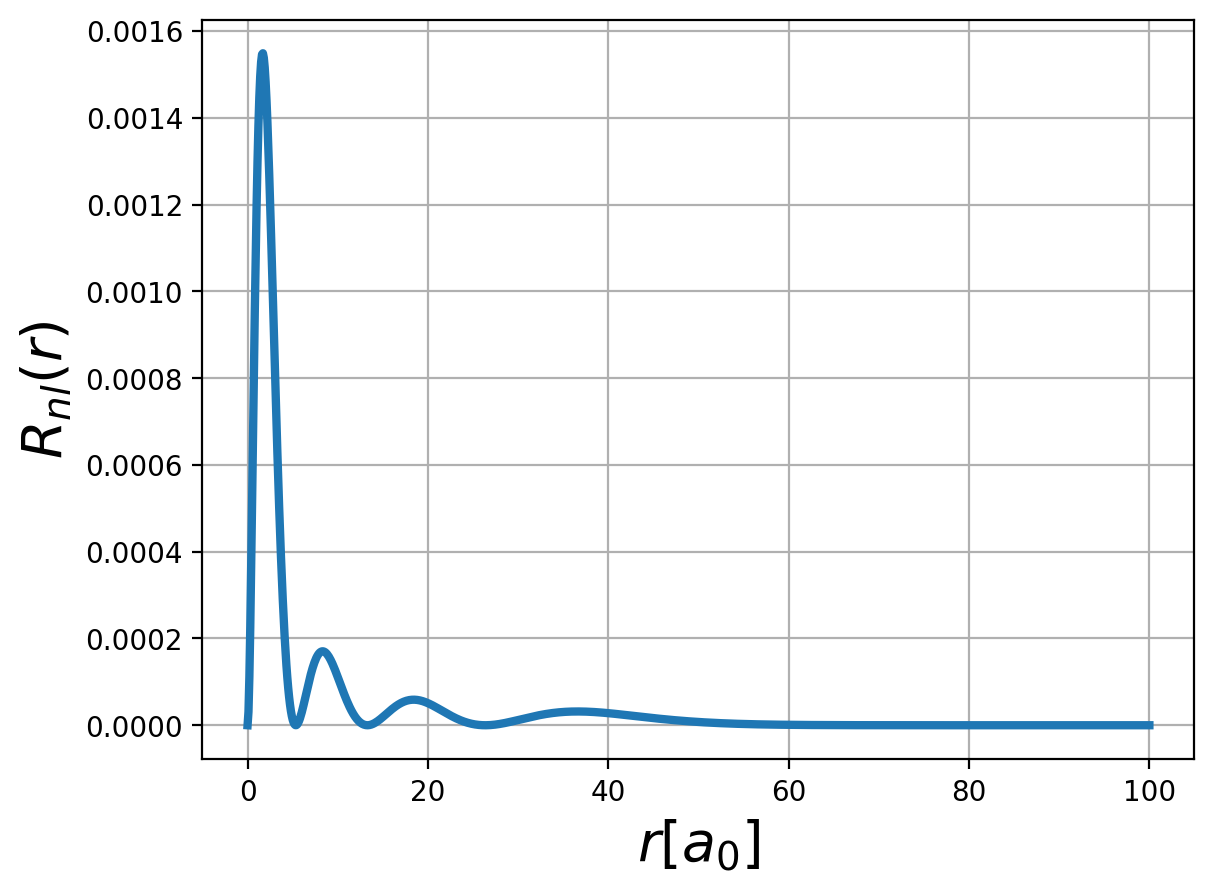

In [ ]:
r = np.linspace(0, 100, 1000)
R = psi_R(r, n=5, l=1)

plt.plot(r, R**2, lw=3)
plt.xlabel('$r [a_0]$',fontsize=20)
plt.ylabel('$R_{nl}(r)$', fontsize=20)
plt.grid('True')

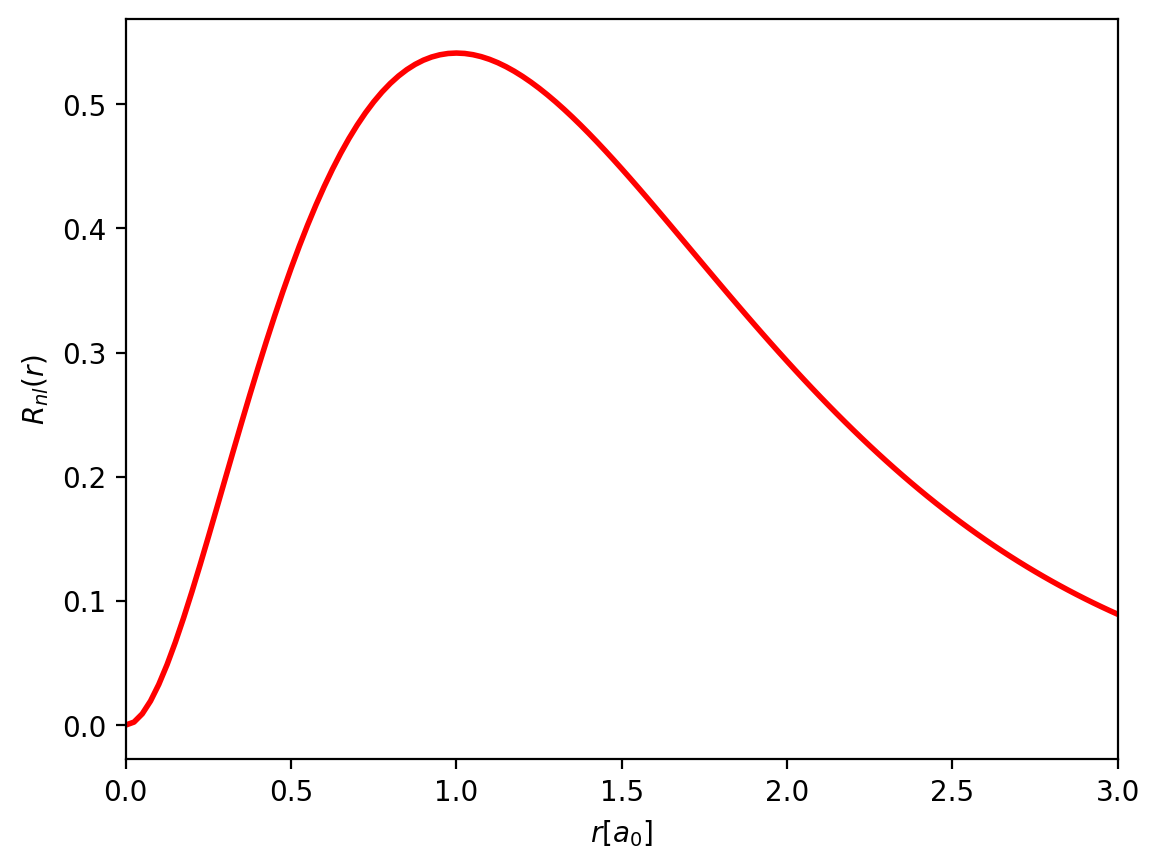

interactive(children=(Dropdown(description='n', options=(1, 2, 3, 4, 5, 6, 7, 8, 9), value=1), Dropdown(descri…

In [ ]:
nmax=10

@widgets.interact(n = np.arange(1, nmax, 1), l = np.arange(0, nmax-1, 1))

def plot_radial(n=1,l=0):
    r =    np.linspace(0,250,10000)
    psi2 = psi_R(r,n,l)**2 * (r**2)
    plt.plot(r, psi2, lw=2, color='red')

    ''' Styling the plot'''
    plt.xlabel('$r [a_0]$')
    plt.ylabel('$R_{nl}(r)$')
    rmax = n**2*(1+0.5*(1-l*(l+1)/n**2))
    plt.xlim([0, 2*rmax])

In [ ]:
def psi_ang(phi,theta,l=0,m=0):
    sphHarm = spe.sph_harm(m,l,phi,theta)
    
    return sphHarm.real

In [ ]:
phi, theta = np.linspace(0, np.pi, 100), np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi, theta)
Ylm = psi_ang(theta,phi,l=2,m=0)

In [ ]:
x = np.sin(phi) * np.cos(theta) * abs(Ylm)
y = np.sin(phi) * np.sin(theta) * abs(Ylm)
z = np.cos(phi) * abs(Ylm)

(-1.0, 1.0)

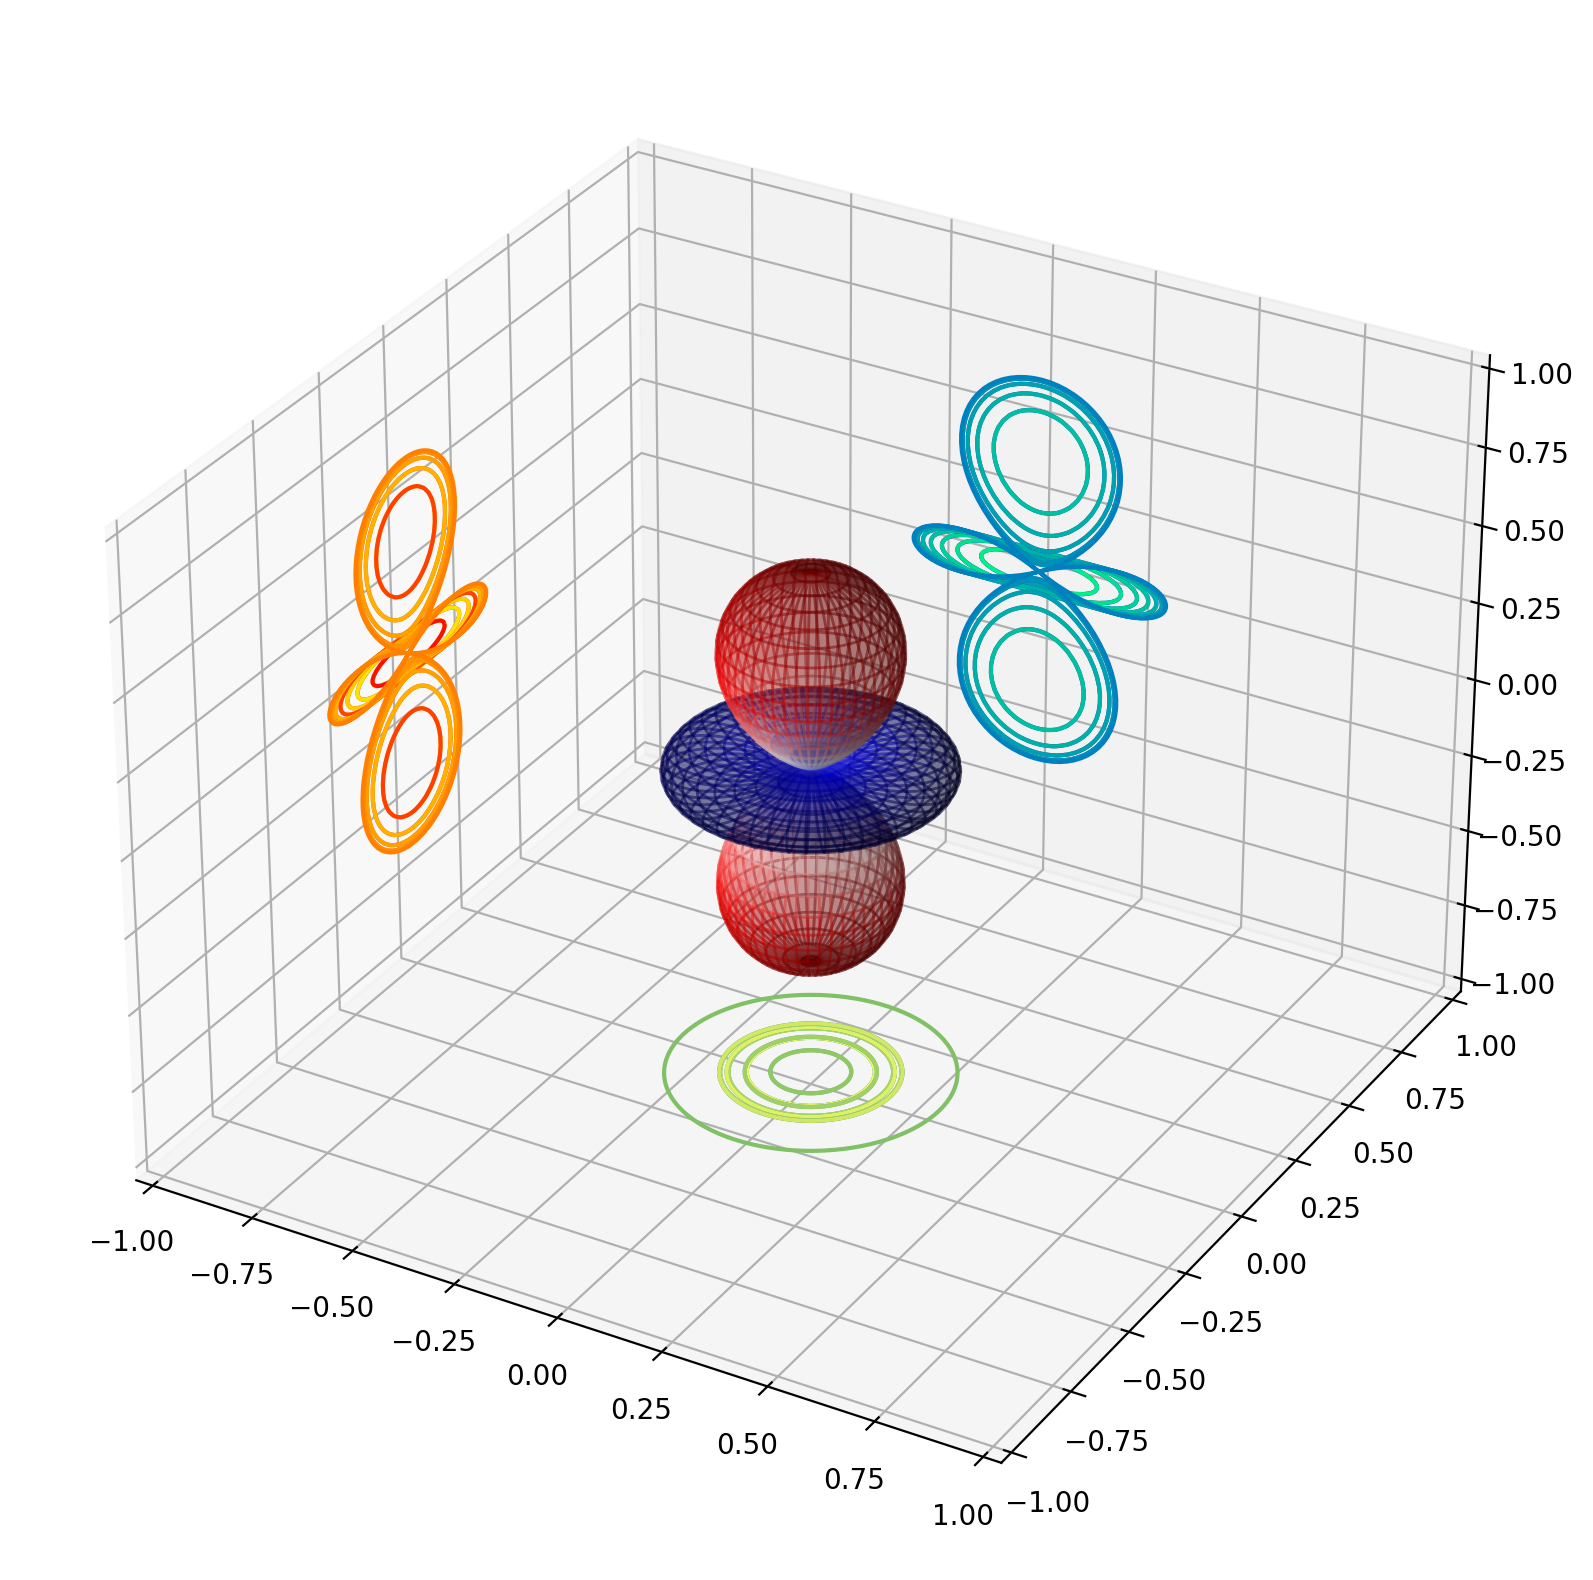

In [ ]:
# Set up the 3D Canvas
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Normalize color bar to [0,1] scale
fcolors = (Ylm - Ylm.min())/(Ylm.max() - Ylm.min())

# Make 3D plot of real part of spherical harmonic
ax.plot_surface(x, y, z, facecolors=cm.seismic(fcolors), alpha=0.3)

# Project 3D plot onto 2D planes
cset = ax.contour(x, y, z,20, zdir='z',offset = -1, cmap='summer')
cset = ax.contour(x, y, z,20, zdir='y',offset =  1, cmap='winter' )
cset = ax.contour(x, y, z,20, zdir='x',offset = -1, cmap='autumn')

# Set axes limit to keep aspect ratio 1:1:1
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

> ไฟล์ Python Notebook สำหรับหนังสือ "การเรียนรู้ของเครื่องสำหรับเคมีควอนตัม" โดย รังสิมันต์ เกษแก้ว

This is a Python notebook for "Machine Learning for Quantum Chemistry" book by Rangsiman Ketkaew

In [ ]:
def HFunc(r,theta,phi,n,l,m):
    '''
    Hydrogen wavefunction // a_0 = 1

    INPUT
        r: Radial coordinate
        theta: Polar coordinate
        phi: Azimuthal coordinate
        n: Principle quantum number
        l: Angular momentum quantum number
        m: Magnetic quantum number

    OUTPUT
        Value of wavefunction
    '''

    return psi_R(r,n,l) * psi_ang(phi,theta,l,m)

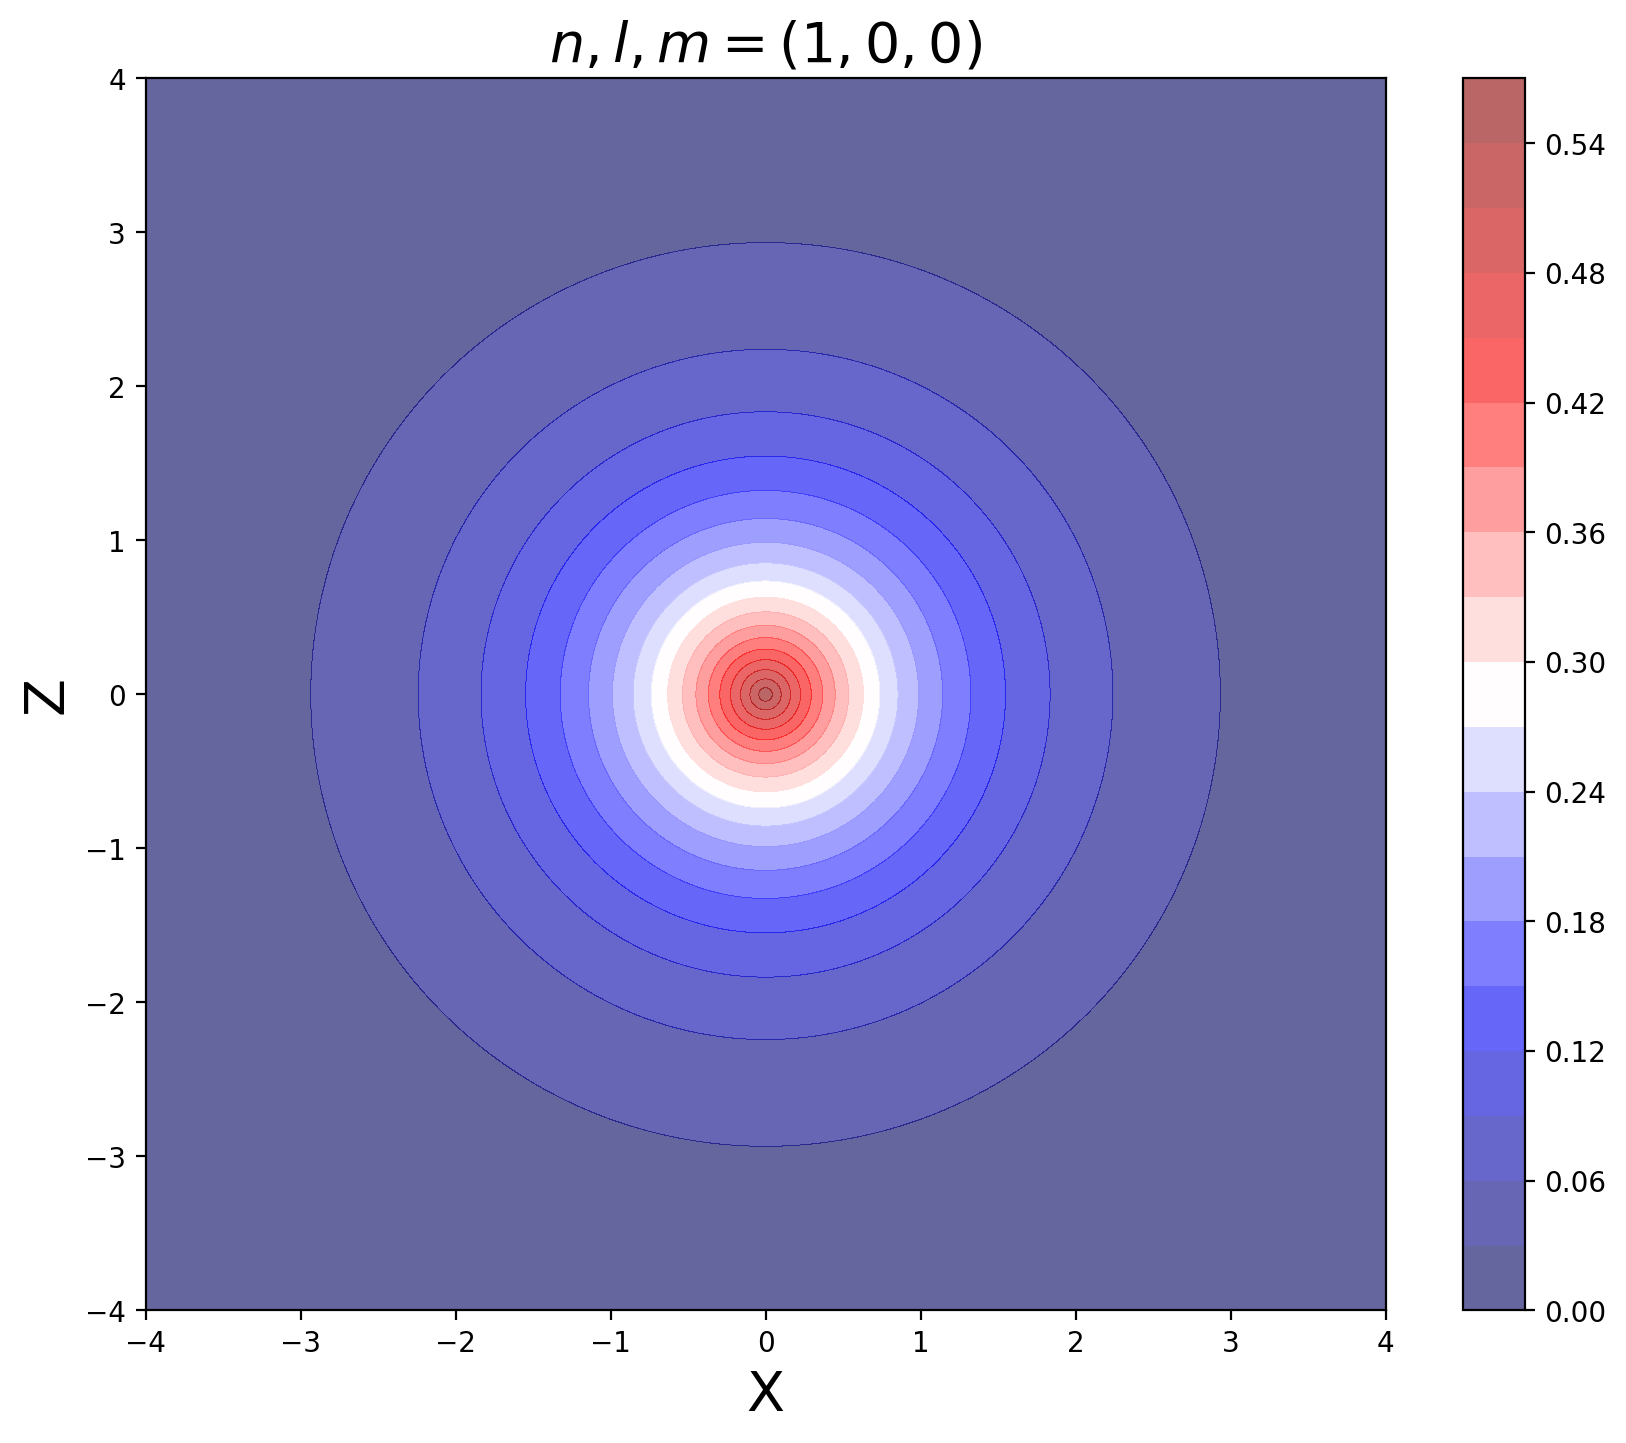

interactive(children=(Dropdown(description='n', options=(1, 2, 3, 4, 5, 6, 7, 8, 9), value=1), Dropdown(descri…

In [ ]:
nmax = 10
lmax = nmax-1

@widgets.interact(n=np.arange(1,nmax,1), l = np.arange(0,nmax-1,1), m=np.arange(-lmax,lmax+1,1))

def psi_xz_plot(n=1,l=0,m=0):
    plt.figure(figsize=(10,8))
    
    limit = 4*(n+l) 
    
    x_1d = np.linspace(-limit,limit,500)
    z_1d = np.linspace(-limit,limit,500)
    
    x,z = np.meshgrid(x_1d,z_1d)
    y   = 0
    
    r     = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arctan2(np.sqrt(x**2+y**2), z )
    phi   = np.arctan2(y, x)

    psi_nlm = HFunc(r,theta,phi,n,l,m)
    
    #plt.pcolormesh(x, z, psi_nlm, cmap='inferno')  # Try cmap = inferno, rainbow, autumn, summer, 
    
    plt.contourf(x, z,  psi_nlm, 20, cmap='seismic', alpha=0.6)  # Classic orbitals
    plt.colorbar()
    plt.title(f"$n,l,m={n,l,m}$",fontsize=20)
    plt.xlabel('X',fontsize=20)
    plt.ylabel('Z',fontsize=20)

In [ ]:
# Variables to adjust
maxi = 60
resolution = 160

base = np.linspace(-maxi, maxi, resolution)[:,np.newaxis,np.newaxis]
x2 = np.tile(base, (1,resolution,resolution))
y2 = np.swapaxes(x2,0,1)
z2 = np.swapaxes(x2,0,2)

total = np.concatenate((x2[np.newaxis,:],y2[np.newaxis,:],z2[np.newaxis,:]), axis=0)

r2 = np.linalg.norm(total, axis=0)
# Alternative theta calculation
# theta3 = np.abs(np.arctan2(np.linalg.norm(total[:2], axis=0),-total[2]))
np.seterr(all='ignore')
phi2 = np.arctan(np.divide(total[2],np.linalg.norm(total[:2], axis=0))) + np.pi/2
theta2 = np.arctan2(total[1],total[0])

In [ ]:
ipv.figure()
psi = HFunc(r2,theta2,phi2,2,1,1)
ipv.volshow(r2**2 * np.sin(phi2)*psi**2)
ipv.show()

In [ ]:
psi.shape

(160, 160, 160)

(160, 160, 160)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fc3d2631-9178-4bf3-9db3-87923c482dce' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>